<a href="https://colab.research.google.com/github/sazidabintaislam/Pre-trained_Xception_model/blob/main/Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#The code has been adopted from this link "https://keras.io/examples/vision/image_classification_from_scratch/""
#Importaning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#we will use some standard syntax to import library
#Basically what we are doing is we import the tensorflow python library,  
#tensorflow is a software package , where we are going to use tf and access to the atributes or the fuction properties of tensorflow library. 
#keras is also a library, on top of tensorflow 

In [ ]:
#HTTP is the protocol used to fetch data from web servers. 
#curl is a command-line utility for transferring data  without user interaction. 
#With curl, you can download or upload data using one of the supported protocols including HTTP, HTTPS.
#we will first use the !, that will let us to use the terminal command in google cloab jupiter notebook. 
#The syntax for curl command is : curl [options] [htpps.....] 
#to save the result of curl command, we use -o or -O option 
#Lowercase -o saves the file with a predefined filename, 
#Uppercase -O saves the file with its original filename 
#https://linuxize.com/post/curl-command-examples/

In [ ]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
# we can see that we have 786M dataset. it took arounf 3 sec . it will vary considering the internet speed.
# you can see the dataset is now appear in our directory, because we just downloaded. 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0   120M      0  0:00:06  0:00:06 --:--:--  129M


In [ ]:
#By default, unzip prints the names of all the files it’s extracting and a summary when the extraction is completed.

#Use the -q switch to suppress the printing of these messages.

In [ ]:
!unzip -q kagglecatsanddogs_3367a.zip
!ls

 kagglecatsanddogs_3367a.zip   PetImages        sample_data
'MSR-LA - 3467.docx'	      'readme[1].txt'


In [ ]:
!ls PetImages
# show command
#it will provide the list of contents of the current directory

Cat  Dog


In [ ]:
# we are gathering our data from. and some of the data might be corrupted of unwanted formate. 
# we will filter and remove unwanted dataset < which are not jpeg by looping through all theimages. 
import os 
#OS module in Python provides functions for interacting with the operating system. 
#this comes under Python’s standard utility modules. 
#this contains functions to get information on local directories, files, processes, and environment variables.
#If we wanted to access a particular file or directory in this folder, 
#you need to import the os library into your code:

num_skipped = 0 # we will start from 0 so that we have an idea how many images are corrupted. 
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("PetImages", folder_name) #os.path module is sub-module of OS module in Python used for common pathname manipulation.
                                                          #what it is doing is concatinate pet image with cats and dog directory
    for fname in os.listdir(folder_path): 
      # after that we join the os.listdirectory folder path, so we pass the folder path pet images. 
      # we loop through each filename in that folder
        fpath = os.path.join(folder_path, fname)   # we join the path so that we can open the file.
      #Python method listdir() returns a list 
    #containing the names of the entries in the directory given by path. 
    #The list is in arbitrary order.
        try:  #This block will test the excepted error to occur
            fobj = open(fpath, "rb") #read mode (r) with binary I/O (b), it is in byte format.
            #Thus, one byte can represent a decimal number between 0(00) and 255.
            #Extremely large numbers cannot be stored in computer memory using standard representations, 
            #and there is a limit to the precision with which real numbers can be stored.
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10) #Raise an error and stop the program when there is an error in the try block:
        finally:
            fobj.close() 
            # The finally block will always be executed, no matter if the try block raises an error or not
            ## code that clean up

        if not is_jfif:
            num_skipped += 1 #image is += 1 increments i by 1
            # Delete corrupted image
            os.remove(fpath) # it's gonna remove the corrupted file. 

print("Deleted %d images" % num_skipped) #%d work for numerical or decimal variables.to specify integer values, decimals or numbers.

Deleted 1590 images


In [ ]:
try:
  x > 3
except:
  print("Something went wrong")
else:
  print("Nothing went wrong")
finally:
  print("The try...except block is finished")

Something went wrong
The try...except block is finished


In [ ]:
# This is a pretrained model, where the model is well designed with appropriate layer and paremeter. This is robust model shows extremely good performance in iamge classification task. 
#in general, it tends to work much better with images, we will see how we can laverage this big model for our dataset.  
# we can change parameter, such as number of filter and filter size. 
#for pretrained model, there are usually two opyions: weight of pretrained model , randomly initialzed weight. 
#for this tutorial, we will just use the model, but the weight will be initialized randomly. 

In [ ]:
image_size = (180, 180)
batch_size = 32

#It is a strategy to loading dataset from directory, 
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2, # we are going to use a subset of 20, we can validate our model and pytertune our model to get desire putput. 
    subset="training",
    seed=1337, #to reproduce the same result everytime, otherwise, weverytime there might be randomness how to split data. 
    #Seed will allow to work with same set of data everytime we run the program
    #in that way, we can change the parameter and compare the result.
    # a random data is not conflicting your result
    image_size=image_size, #we pass image size argument
    batch_size=batch_size,# we define the batch size argument
    label_mode="binary",
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="binary",
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Found 23410 files belonging to 2 classes.
Using 4682 files for validation.


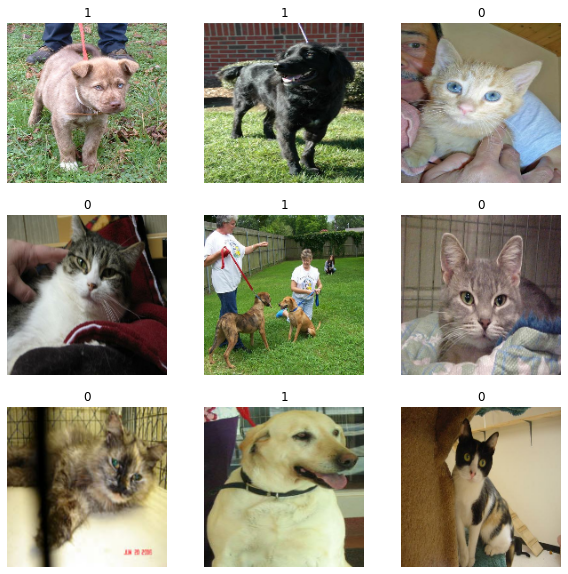

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10)) #we define the figure, and define size of the figure
for images, labels in train_ds.take(1): #nae of the fuction that storying all the atributes under that
                                        #.take sames the next image 
                                        #it will retrun another image from the pripeline of that disk, or the directory, folder
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8")) #matplotlib take data into numpy array, so we are converting jpeg into numpy
        #In order to change the dtype of the given array object, we will use numpy. astype() function. 
        #The function takes an argument which is the target data type. 
        #8-bit unsigned integer (0 to 255).Pixels are uint8 [0,255].
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

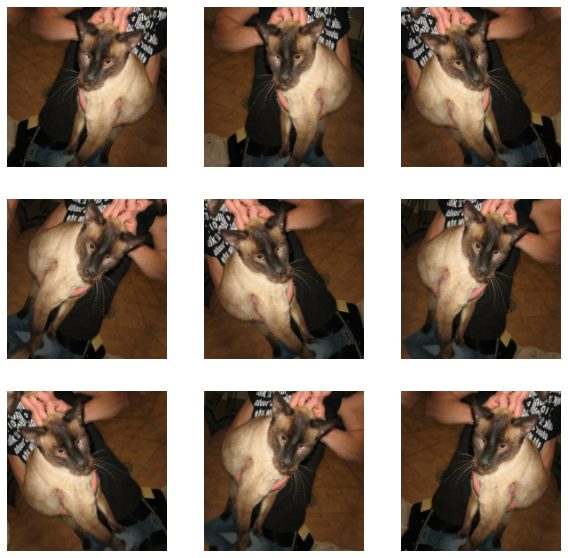

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

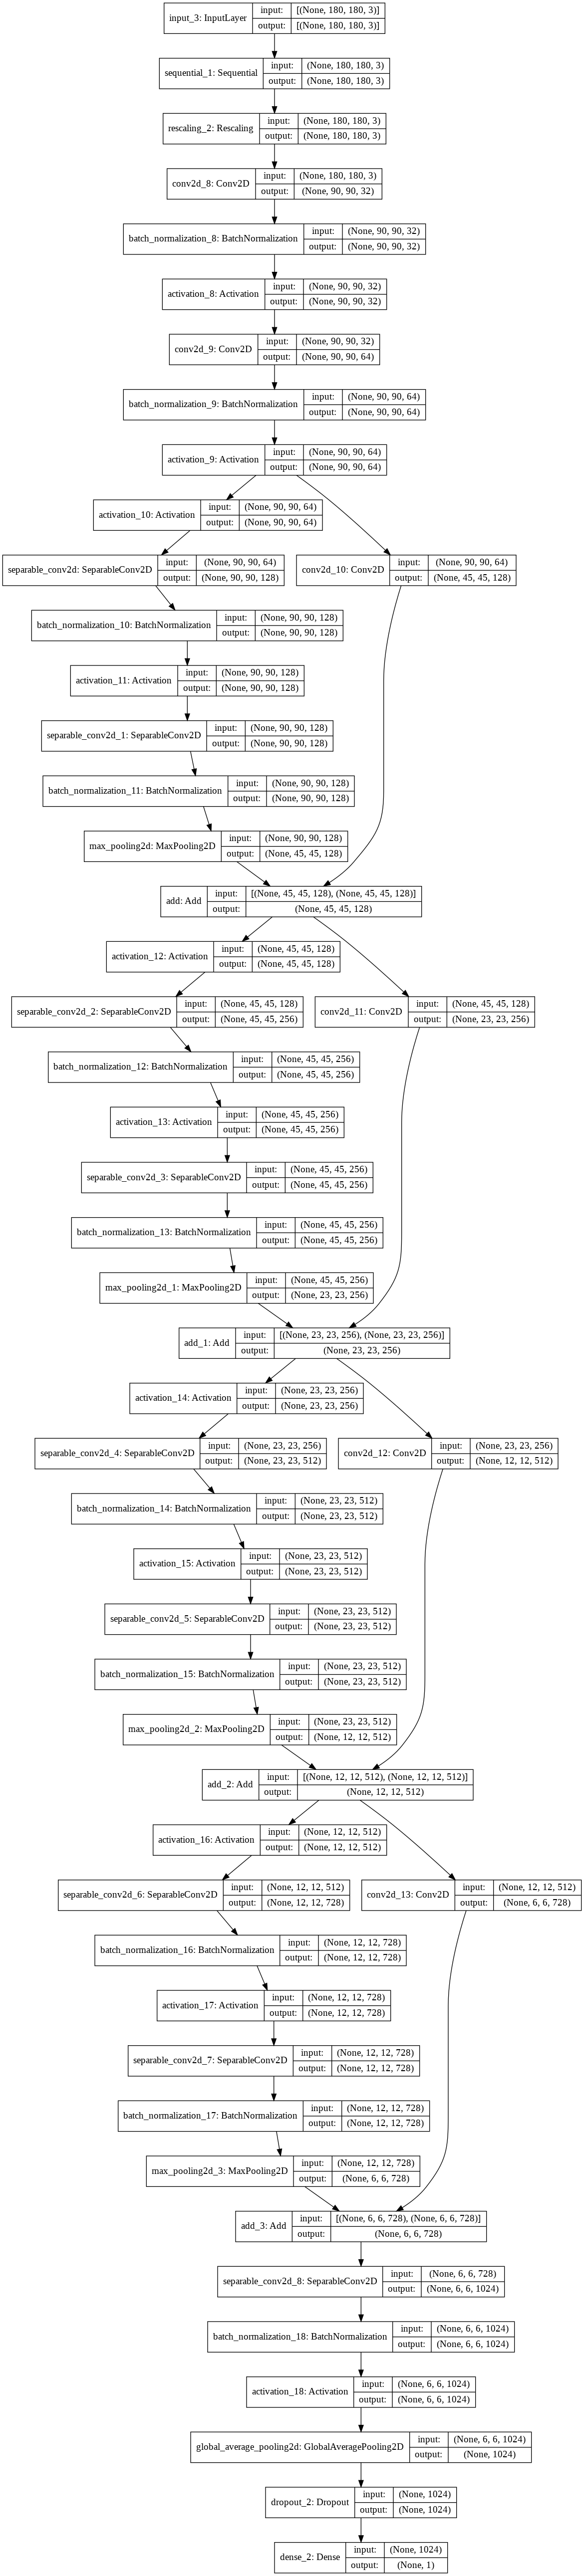

In [ ]:
#

def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

#For most image data, the pixel values are integers with values between 0 and 255.
#Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. 
#As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.
#It is valid for images to have pixel values in the range 0-1 and images can be viewed normally.
#This can be achieved by dividing all pixels values by the largest pixel value; that is 255. 


#Xception was proposed by none other than François Chollet himself, the creator and chief maintainer of the Keras library.
# Entry block
# so the way inception is working here is it is taking input and passing oit throug convolution, batch and relu
    x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x) #its normalizing the each pixel value between 0-1
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x) #stride is downsampling
                                                            #padding is same to keep same resolution, it adds zero outside of the pixel, so that theimage is not downsample that much

#here , we are taking previous layer output and passing to the chain of the next layer
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual # then they will pass through residual connection
                                    #it helps to preserve information in deep neura; network

    for size in [128, 256, 512, 728]:  #looping through and constrccting netwrok through a for loop
    
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 5

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/5


ValueError: ignored